## Titanic - Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#graphs appear in notebook
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libaries loaded")

Libaries loaded


In [2]:
train = pd.read_csv('../data/raw/train.csv')

print(f"Data shape: {train.shape}")
print(f"Columns: {list(train.columns)}")

Data shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Missing data

In [4]:
missing = train.isnull().sum()
missing_percent = round(missing / len(train)*100,2)

missing_df = pd.DataFrame({
    'Missing': missing,
    'Percent': missing_percent
})
print(missing_df[missing_df['Missing']>0])

          Missing  Percent
Age           177    19.87
Cabin         687    77.10
Embarked        2     0.22


## Survival rate by sex

        Survival %  Total amount
Sex                             
female        74.2           314
male          18.9           577


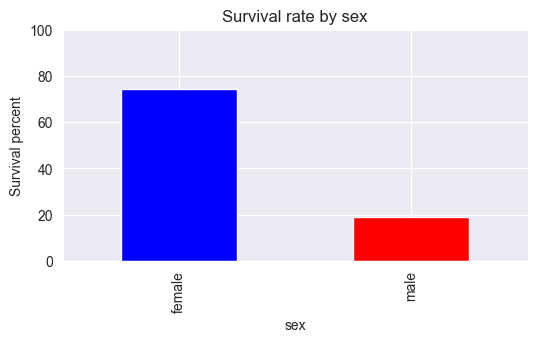

In [5]:
survival_by_sex = train.groupby('Sex')['Survived'].agg(['mean', 'count'])
survival_by_sex['mean'] = (survival_by_sex['mean'] * 100).round(1)
survival_by_sex.columns = ['Survival %', 'Total amount']

print(survival_by_sex)
plt.figure(figsize=(6, 3))
survival_by_sex['Survival %'].plot(kind='bar', color=['blue', 'red'])
plt.title('Survival rate by sex')
plt.ylabel('Survival percent')
plt.xlabel('sex')
plt.ylim(0, 100)
plt.show()

## Survival rate by Pclass

       Survival %       Total amount     
Sex        female  male       female male
Pclass                                   
1            96.8  36.9           94  122
2            92.1  15.7           76  108
3            50.0  13.5          144  347


<Figure size 600x300 with 0 Axes>

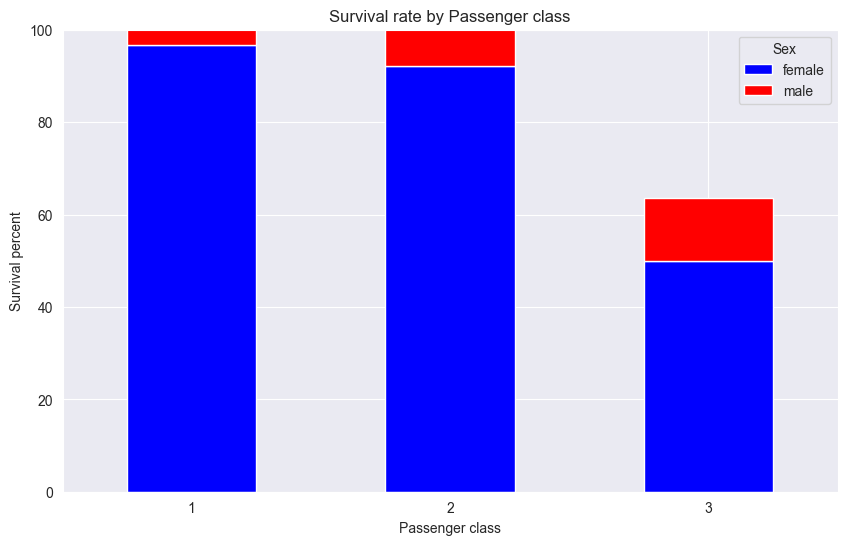

In [13]:
survival_by_Pclass = train.groupby(['Pclass','Sex'])['Survived'].agg(['mean', 'count'])
survival_by_Pclass['mean'] = (survival_by_Pclass['mean'] * 100).round(1)
survival_by_Pclass.columns = ['Survival %', 'Total amount']

survival_by_Pclass = survival_by_Pclass.unstack()
print(survival_by_Pclass)

plt.figure(figsize=(6, 3))
survival_by_Pclass['Survival %'].plot(kind='bar',stacked=True, color=['blue', 'red','green'],rot=0)
plt.title('Survival rate by Passenger class')
plt.ylabel('Survival percent')
plt.xlabel('Passenger class')
plt.ylim(0, 100)
plt.show()

## Survival rate by Age
almost 20% of Age data is missing

                 Survival Rate  Count
Children (<=12)           58.0   69.0
Teens (13-17)             47.7   44.0
Adults (19-59)            38.6  575.0
Elderly (>60)             26.9   26.0


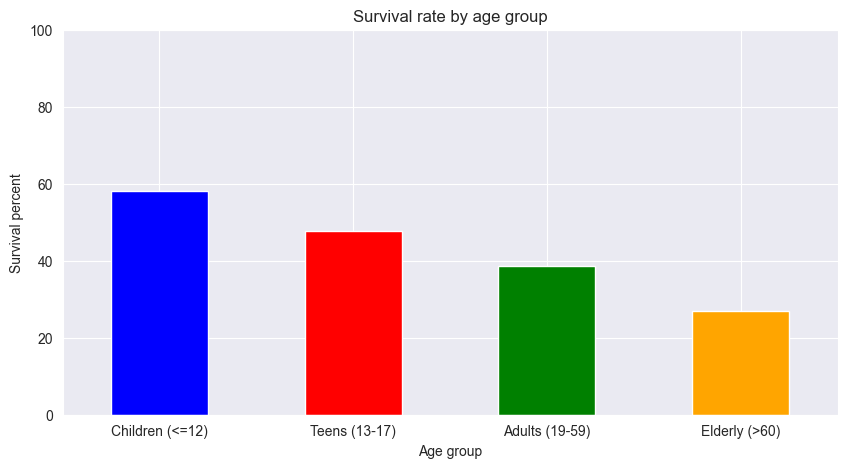

In [7]:
pass_with_age = train[train['Age'].notnull()]

children_percent = pass_with_age[pass_with_age['Age']<=12]['Survived'].agg(['mean','count'])
children_percent['mean'] = (children_percent['mean'] * 100).round(1)
teen_percent = pass_with_age[(pass_with_age['Age']>12) & (pass_with_age['Age']<18)]['Survived'].agg(['mean','count'])
teen_percent['mean'] = (teen_percent['mean'] * 100).round(1)
adults_percent = pass_with_age[(pass_with_age['Age']>=18) & (pass_with_age['Age']<60)]['Survived'].agg(['mean','count'])
adults_percent['mean'] = (adults_percent['mean'] * 100).round(1)
elderly_percent = pass_with_age[pass_with_age['Age']>=60]['Survived'].agg(['mean','count'])
elderly_percent['mean'] = (elderly_percent['mean'] * 100).round(1)



survival_by_age_df = pd.DataFrame({
    'Children (<=12)': children_percent,
    'Teens (13-17)': teen_percent,
    'Adults (19-59)': adults_percent,
    'Elderly (>60)': elderly_percent
    
    }).T
     

survival_by_age_df.columns = ['Survival Rate','Count']   
    
print(survival_by_age_df)

plt.figure(figsize=(10, 5))
survival_by_age_df['Survival Rate'].plot(kind='bar', color=['blue', 'red','green','orange'],rot=0)
plt.title('Survival rate by age group')
plt.ylabel('Survival percent')
plt.xlabel('Age group')
plt.ylim(0, 100)
plt.show()



## Survival by Family Size
Family Size = SibSp + Parch
SibSp - # of siblings / spouses aboard the Titanic	
Parch - # of parents / children aboard the Titanic	

             Survival Rate  Count
Family size                      
0                     30.4    537
1                     55.3    161
2                     57.8    102
3                     72.4     29
4                     20.0     15
5                     13.6     22
6                     33.3     12
7                      0.0      6
10                     0.0      7


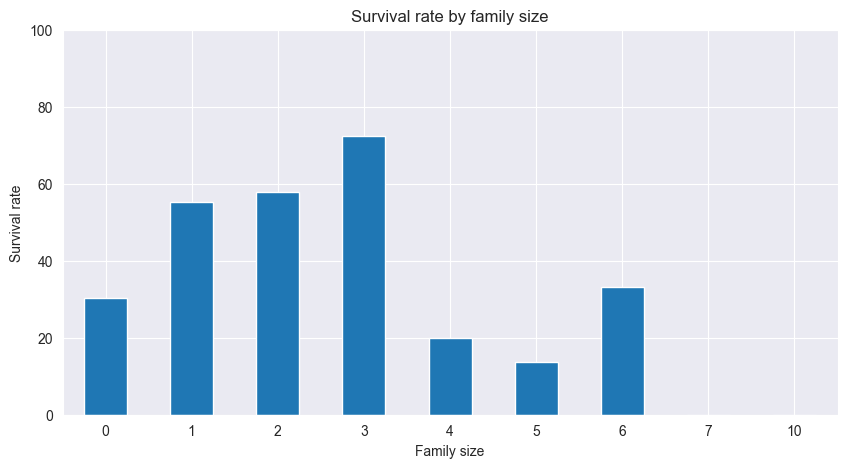

In [8]:
train['Family size'] = train['SibSp'] + train['Parch']
survival_by_fam_size = train.groupby('Family size')['Survived'].agg(['mean','count'])
survival_by_fam_size['mean'] = (survival_by_fam_size['mean'] * 100).round(1)
survival_by_fam_size.columns = ['Survival Rate', 'Count']
print(survival_by_fam_size)

plt.figure(figsize=(10, 5))
survival_by_fam_size['Survival Rate'].plot(kind='bar',rot=0)
plt.title('Survival rate by family size')
plt.ylabel('Survival rate')
plt.xlabel('Family size')
plt.ylim(0, 100)
plt.show()



## Does having assigned cabin influence survival

In [9]:
train['HasCabin'] = train['Cabin'].notna().astype(int)

print("Survival rate według posiadania kabiny:")
print(train.groupby('HasCabin')['Survived'].agg(['mean', 'count']))

Survival rate według posiadania kabiny:
              mean  count
HasCabin                 
0         0.299854    687
1         0.666667    204
